In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
data = pd.read_csv('/content/insurance.csv')

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
df['region'] = pd.factorize(df['region'])[0]

In [ ]:
correlacion_matriz = df.corr()

               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019 -0.002127  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185 -0.004588  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750 -0.157566  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673 -0.016569  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000  0.002181  0.787251
region   -0.002127 -0.004588 -0.157566 -0.016569  0.002181  1.000000  0.006208
charges   0.299008  0.057292  0.198341  0.067998  0.787251  0.006208  1.000000


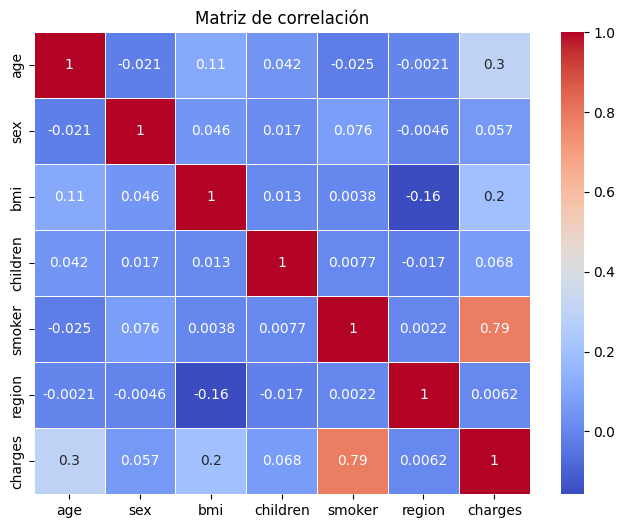

In [ ]:
print(correlacion_matriz)
#Graficar
plt.figure(figsize=(8,6))
sns.heatmap(correlacion_matriz, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


In [ ]:
# Selección de variables (X) e independiente (y)
X = df[['age','sex', 'bmi', 'children', 'smoker','region']]
y = df['charges']

In [ ]:
# División en conjuntos de entrenamiento y prueba
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Sat, 28 Sep 2024   Prob (F-statistic):               0.00
Time:                        23:36:10   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.288e+04   1013.505    -12.705      0.0

In [ ]:
# Calcular los coeficientes utilizando la fórmula de mínimos cuadrados
beta = np.linalg.inv(X.T @ X) @ (X.T @ y)
print("Coeficientes (β):", beta)


Coeficientes (β): [-12876.37237091    257.28807486   -131.11057962    332.57013224
    479.36939355  23820.43412267    353.64001656]


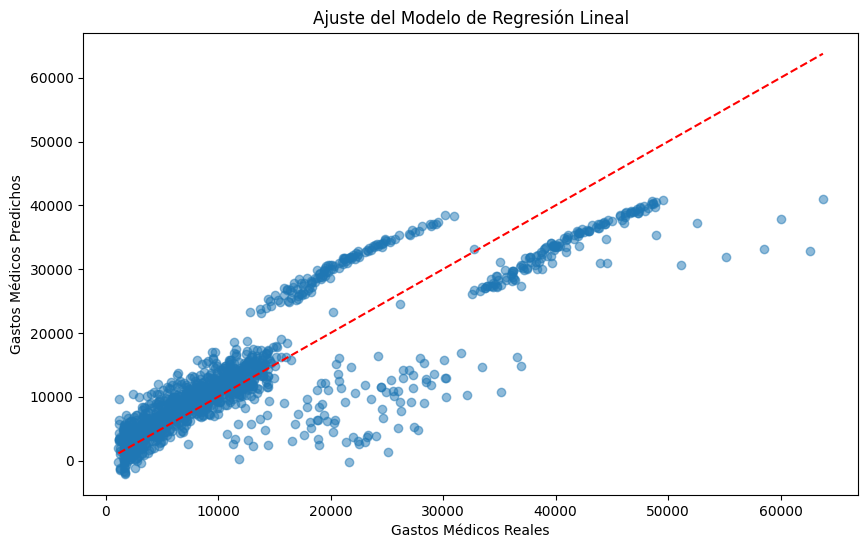

In [ ]:
# Predicciones
y_pred = X @ beta

# Visualizar
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Línea de referencia
plt.xlabel('Gastos Médicos Reales')
plt.ylabel('Gastos Médicos Predichos')
plt.title('Ajuste del Modelo de Regresión Lineal')
plt.show()


In [ ]:
# Ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Hacer predicciones
y_pred = model.predict(X_test)

In [ ]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [ ]:
print(f"Coeficientes del modelo: {model.coef_}")
print(f"Intercepto: {model.intercept_}")
print(f"Error cuadrático medio (MSE): {mse}")
print(f"R² (Coeficiente de determinación): {r2}")

Coeficientes del modelo: [ 2.57056264e+02 -1.87914567e+01  3.35781491e+02  4.25091456e+02
  2.36478181e+04  2.71284266e+02]
Intercepto: -12760.459365293491
Error cuadrático medio (MSE): 33635210.431178406
R² (Coeficiente de determinación): 0.7833463107364539


In [ ]:
# Calcular X^T * X
XtX = X.T @ X
# Calcular la inversa de X^T * X
XtX_inv = np.linalg.inv(XtX)
# Calcular X^T * y
XtY = X.T @ y
# Calcular los coeficientes
beta_manual = XtX_inv @ XtY
print("Coeficientes calculados manualmente:", beta_manual)


Coeficientes calculados manualmente: [-12876.37237091    257.28807486   -131.11057962    332.57013224
    479.36939355  23820.43412267    353.64001656]


In [ ]:

# Ajustar el modelo
model = sm.OLS(y, X).fit()

# Imprimir el resumen del modelo
print(model.summary())

# El R-squared se muestra en el resumen
r_squared = model.rsquared
print(f"R²: {r_squared}")


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Sat, 28 Sep 2024   Prob (F-statistic):               0.00
Time:                        23:42:53   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.288e+04   1013.505    -12.705      0.0

In [ ]:
from sklearn.metrics import r2_score

# Ajustar el modelo de regresión lineal (ya se hizo anteriormente)
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Calcular R²
r_squared = r2_score(y_test, y_pred)
print(f"R²: {r_squared}")


R²: 0.7833463107364539


In [ ]:
intercept = model.intercept_
coefficients = model.coef_
# Imprimir la ecuación de la recta
equation = f"charges = {intercept:.2f} + {coefficients[0]:.2f} * age + {coefficients[1]:.2f} * bmi + {coefficients[2]:.2f} * children + {coefficients[3]:.2f} * smoker"
print(equation)

charges = -12760.46 + 257.06 * age + -18.79 * bmi + 335.78 * children + 425.09 * smoker


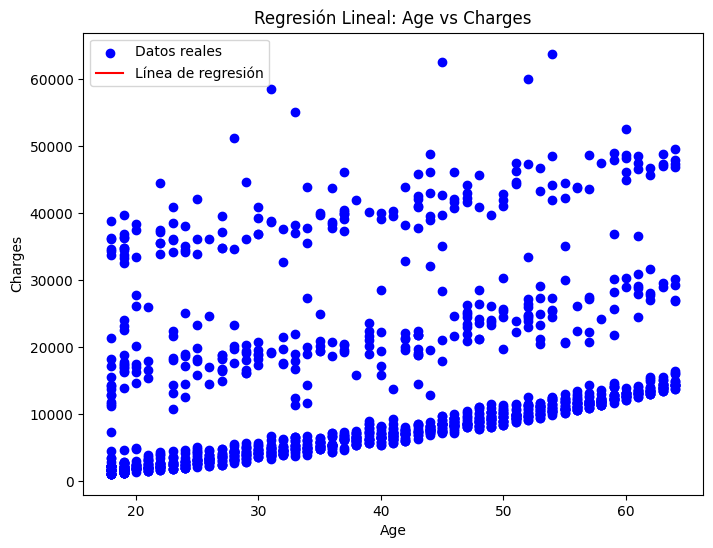

In [ ]:
import numpy as np

# Crear una serie de edades para predecir
age_range = np.linspace(X['age'].min(), X['age'].max(), 100).reshape(-1, 1)
# Suponiendo que los demás parámetros son constantes (por ejemplo, promedio)
average_bmi = X['bmi'].mean()
average_children = X['children'].mean()
average_smoker = X['smoker'].map({'yes': 1, 'no': 0}).mean()

# Predecir cargos usando la regresión lineal
predicted_charges = model.intercept_ + model.coef_[0] * age_range + model.coef_[1] * average_bmi + model.coef_[2] * average_children + model.coef_[3] * average_smoker

# Graficar
plt.figure(figsize=(8, 6))
plt.scatter(X['age'], y, color='blue', label='Datos reales')
plt.plot(age_range, predicted_charges, color='red', label='Línea de regresión')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Regresión Lineal: Age vs Charges')
plt.legend()
plt.show()
